<a href="https://colab.research.google.com/github/JYP0824/study/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 2
xy = np.random.choice(401, (400, 2))
avgs = xy[np.random.choice(xy.shape[0], a, replace = False)]
dots = np.zeros(xy.shape[0])

In [ ]:
xy_list = list(xy)
duplicate_xy = set()
duplicate = False

for xy_dot in xy_list:
  xy_tuple = tuple(xy_dot)
  if xy_tuple in duplicate_xy:
    duplicate = True
    print(f"중복 xy좌표값: {xy_dot}")
  else:
    duplicate_xy.add(xy_tuple)
if not duplicate:
  print("중복 X")

중복 X


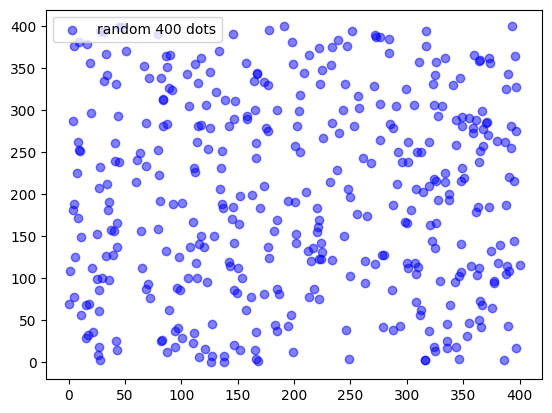

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1], c='b', alpha = 0.5, label='random 400 dots')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
dots

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
dots[np.random.choice(400, 200, replace=False)]=1
dots

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0.

In [ ]:
def center_avg(xy, avgs):
  dot_avg = np.linalg.norm(xy[:, np.newaxis] - avgs, axis=2)
  return np.argmin(dot_avg, axis=1)

In [ ]:
def xy_visualize(xy, avgs, group, repeat):
  for i in range(a):
    dot_xy = xy[group == i]
    color = 'red' if i == 0 else 'blue'
    plt.scatter(dot_xy[:, 0], dot_xy[:, 1], c = color, label=f'Group {i}', alpha = 0.5)
  plt.scatter(avgs[0][0], avgs[0][1], c='lime', marker='v', label='Group0_avg')
  plt.scatter(avgs[1][0], avgs[1][1], c='gold', marker='v',label='Group1_avg')
  plt.legend(loc = 'upper left')
  plt.title({repeat})
  plt.show()
  for i in range(a):
    dot_xy = xy[dots == i]
    dot_avg = avgs[i]
    print(f'Group {i} - 평균 좌표: {avgs[i]}, 그룹 내 좌표값의 수: {len(dot_xy)}')

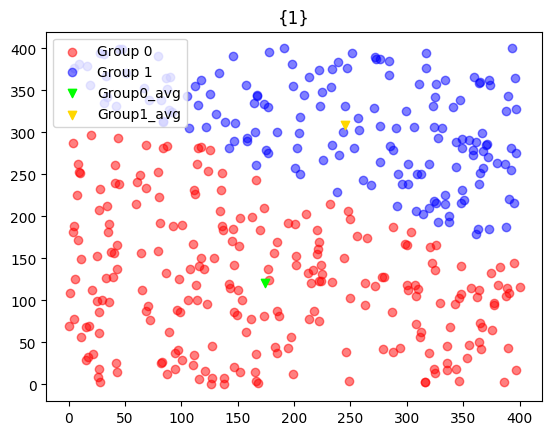

Group 0 - 평균 좌표: [174.41101695 120.6779661 ], 그룹 내 좌표값의 수: 236
Group 1 - 평균 좌표: [245.14634146 308.40853659], 그룹 내 좌표값의 수: 164


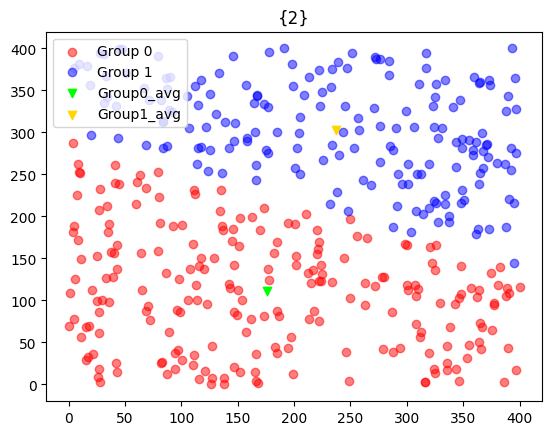

Group 0 - 평균 좌표: [175.76712329 110.72146119], 그룹 내 좌표값의 수: 219
Group 1 - 평균 좌표: [236.86187845 302.82320442], 그룹 내 좌표값의 수: 181


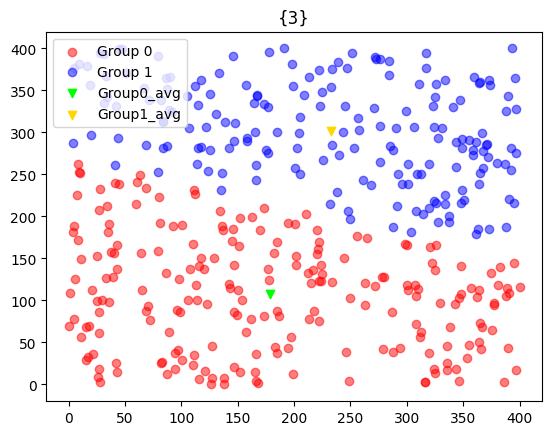

Group 0 - 평균 좌표: [178.50697674 107.73953488], 그룹 내 좌표값의 수: 215
Group 1 - 평균 좌표: [232.35675676 302.13513514], 그룹 내 좌표값의 수: 185


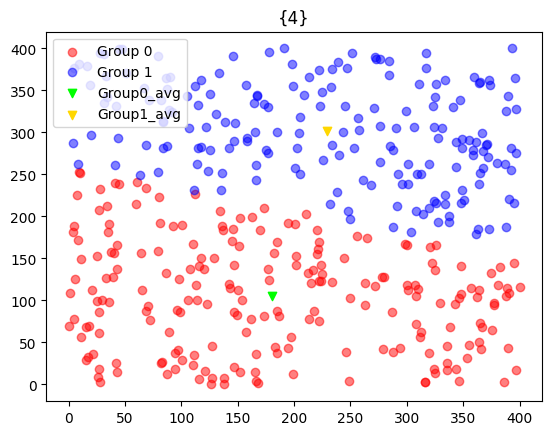

Group 0 - 평균 좌표: [180.1745283  105.75943396], 그룹 내 좌표값의 수: 212
Group 1 - 평균 좌표: [229.61702128 301.26595745], 그룹 내 좌표값의 수: 188


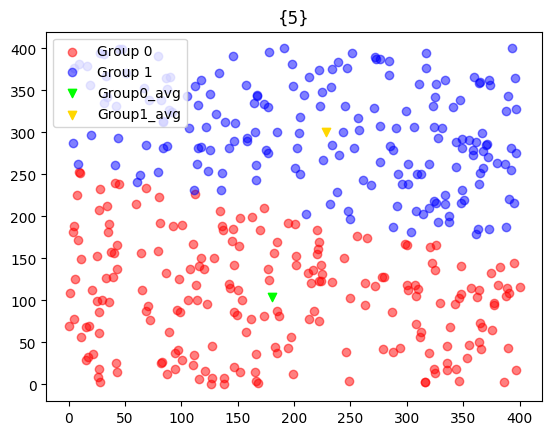

Group 0 - 평균 좌표: [180.5952381  104.65238095], 그룹 내 좌표값의 수: 210
Group 1 - 평균 좌표: [228.63157895 300.43157895], 그룹 내 좌표값의 수: 190


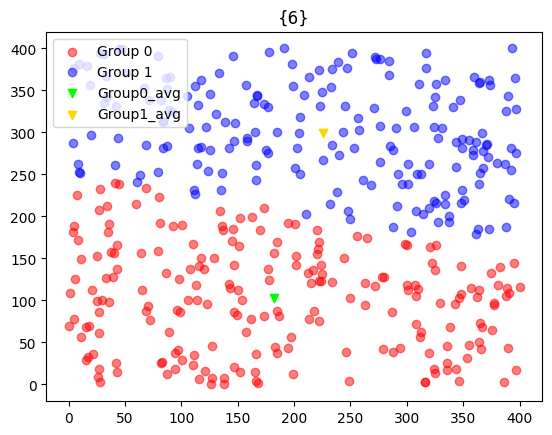

Group 0 - 평균 좌표: [182.57971014 102.63285024], 그룹 내 좌표값의 수: 207
Group 1 - 평균 좌표: [225.75647668 299.55440415], 그룹 내 좌표값의 수: 193


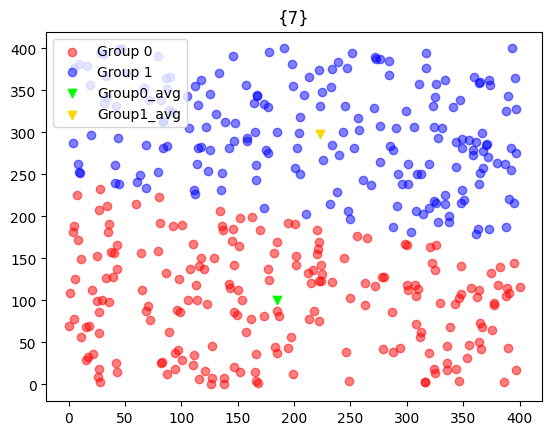

Group 0 - 평균 좌표: [184.56157635 100.10837438], 그룹 내 좌표값의 수: 203
Group 1 - 평균 좌표: [222.83756345 298.15736041], 그룹 내 좌표값의 수: 197


In [ ]:
repeat = 0

while True:
  repeat += 1
  dot_fixed = center_avg(xy, avgs)
  avg_fixed = np.array([xy[dot_fixed == i].mean(axis=0) for i in range(a)])

  if np.array_equal(dots, dot_fixed):
    break
  dots = dot_fixed
  avgs = avg_fixed
  xy_visualize(xy, avgs, dots, repeat)

In [ ]:
print(dots)

[1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1]
